In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import (
    month_plot,
    quarter_plot,
    plot_acf,
)

In [3]:
df = pd.read_csv('./data/nyc_data.csv')
df.shape

(2192, 7)

In [4]:
df.head()

,Date,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
0,1/1/2015,720.000885,0,0,0,3.68,41.305
1,1/2/2015,581.276773,0,0,0,4.73,131.574
2,1/3/2015,754.117039,0,0,0,7.23,162.700
3,1/4/2015,622.252774,0,0,0,10.96,160.281
4,1/5/2015,785.373319,0,0,0,6.92,51.077


In [5]:
# Make the `Date` column the index;
# And format it like yyyy-mm-dd
df = pd.read_csv('./data/nyc_data.csv', index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [6]:
# To make it explicit, rename the target variable `Demand` as `y`.
df = df.rename(columns={'Demand': 'y'})
df.head(3)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700


In [7]:
df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059,152.143,425.775,641.161,736.948,855.646,1384.909
Easter,2192.0,0.003,0.052,0.000,0.000,0.000,0.000,1.000
Thanksgiving,2192.0,0.003,0.052,0.000,0.000,0.000,0.000,1.000
Christmas,2192.0,0.003,0.052,0.000,0.000,0.000,0.000,1.000
Temperature,2192.0,15.013,8.773,-8.850,7.768,14.895,23.230,30.900
Marketing,2192.0,126.676,58.274,24.589,78.304,122.764,169.395,299.860


In [8]:
"""
You see that for target variable the max value is 3 times higher than the min val.
This might indicate seasonality in our variable.
"""

'\nYou see that for target variable the max value is 3 times higher than the min val.\nThis might indicate seasonality in our variable.\n'

### Seasonal Decomposition

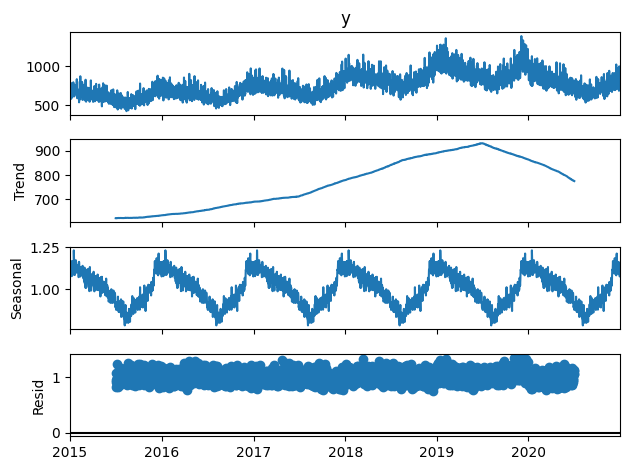

In [9]:
decomp_mul = seasonal_decompose(x=df['y'], model='multiplicative', period=365)
decomp_mul.plot();

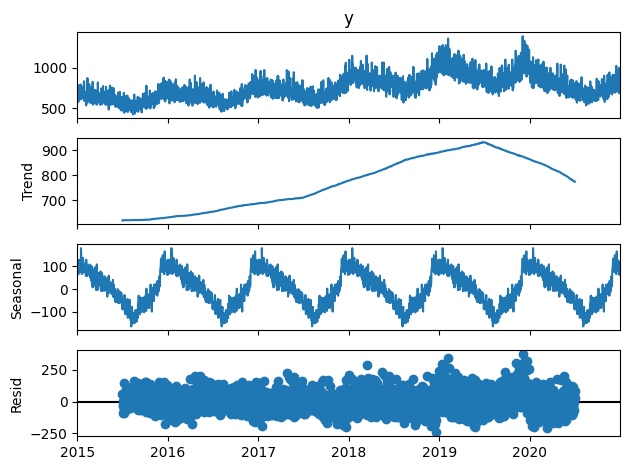

In [10]:
decomp_add = mp = seasonal_decompose(x=df['y'], model='additive', period=365)
decomp_add.plot();

<Axes: xlabel='Date'>

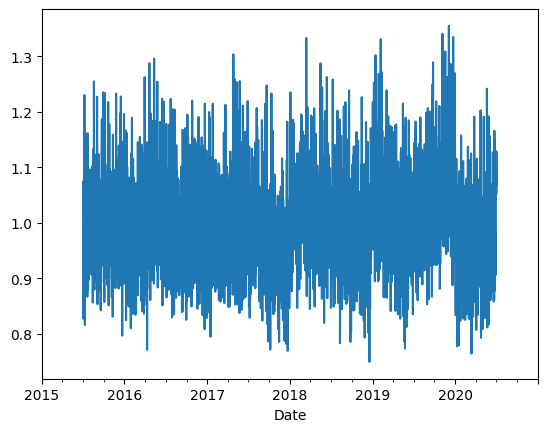

In [11]:
decomp_mul.resid.plot()

<Axes: xlabel='Date'>

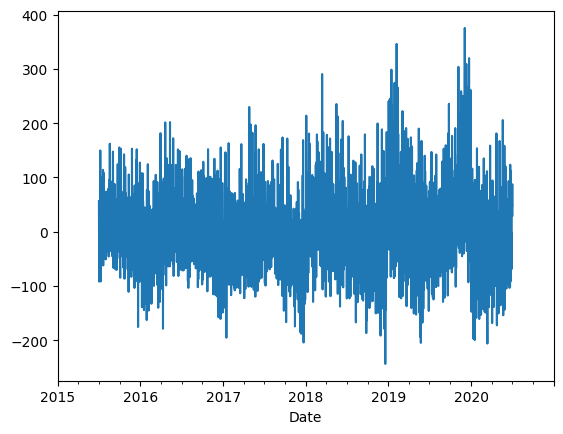

In [12]:
decomp_add.resid.plot()

In [13]:
# Seasonal graphs

## Aggregate the data on monthly timeframe.
df_ms = df['y'].resample(rule='MS').mean()  # MS: month start
df_ms.head(10)

,y
Date,
2015-01-01,692.967611
2015-02-01,676.381042
2015-03-01,646.326069
2015-04-01,636.463333
2015-05-01,621.211624
2015-06-01,592.977187
2015-07-01,553.939339
2015-08-01,526.423455
2015-09-01,564.525124


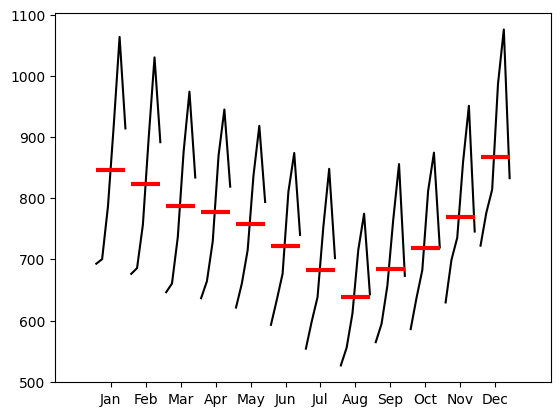

In [14]:
month_plot(df_ms);

As you see, there is a seasonality.
It's generally higher on colder months, and it reaches the low in August, and increases afterwards.

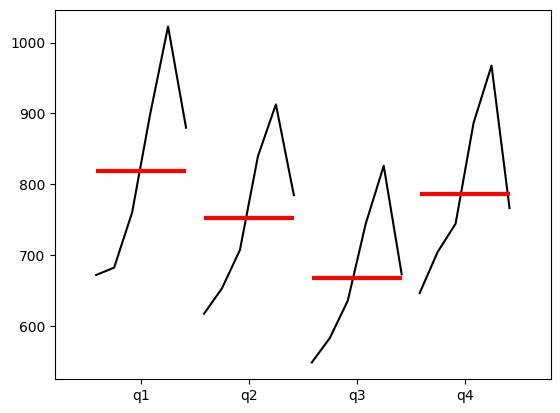

In [15]:
quarter_plot(df['y'].resample(rule='QE').mean());  # quarterly agg

### Further Visualization

In [16]:
def plot_demand_vs_col(dx, col):
    fig, ax1 = plt.subplots(figsize=(20, 8))
    ax2 = ax1.twinx()

    ax1.plot(dx.index, dx['y'], color='k', lw=1)
    ax2.plot(dx.index, dx[col], color='r', lw=1)

    fig.suptitle(f'Relationship between {col} & Demand ', fontsize=20)
    fig.autofmt_xdate()

    ax1.set_label('Date')
    ax1.tick_params(axis='y', labelcolor='k')
    ax1.set_ylabel('Demand', color='k', fontsize=14)

    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylabel(col, color='r', fontsize=14)

    # Add holidays or events.
    evts = dx[(dx['Easter'] == 1) | (dx['Christmas'] == 1)].index
    ymin, ymax = dx['y'].min(), dx['y'].max()
    ax1.vlines(x=evts, ymin=ymin, ymax=ymax, color='g', ls='--')
    ;

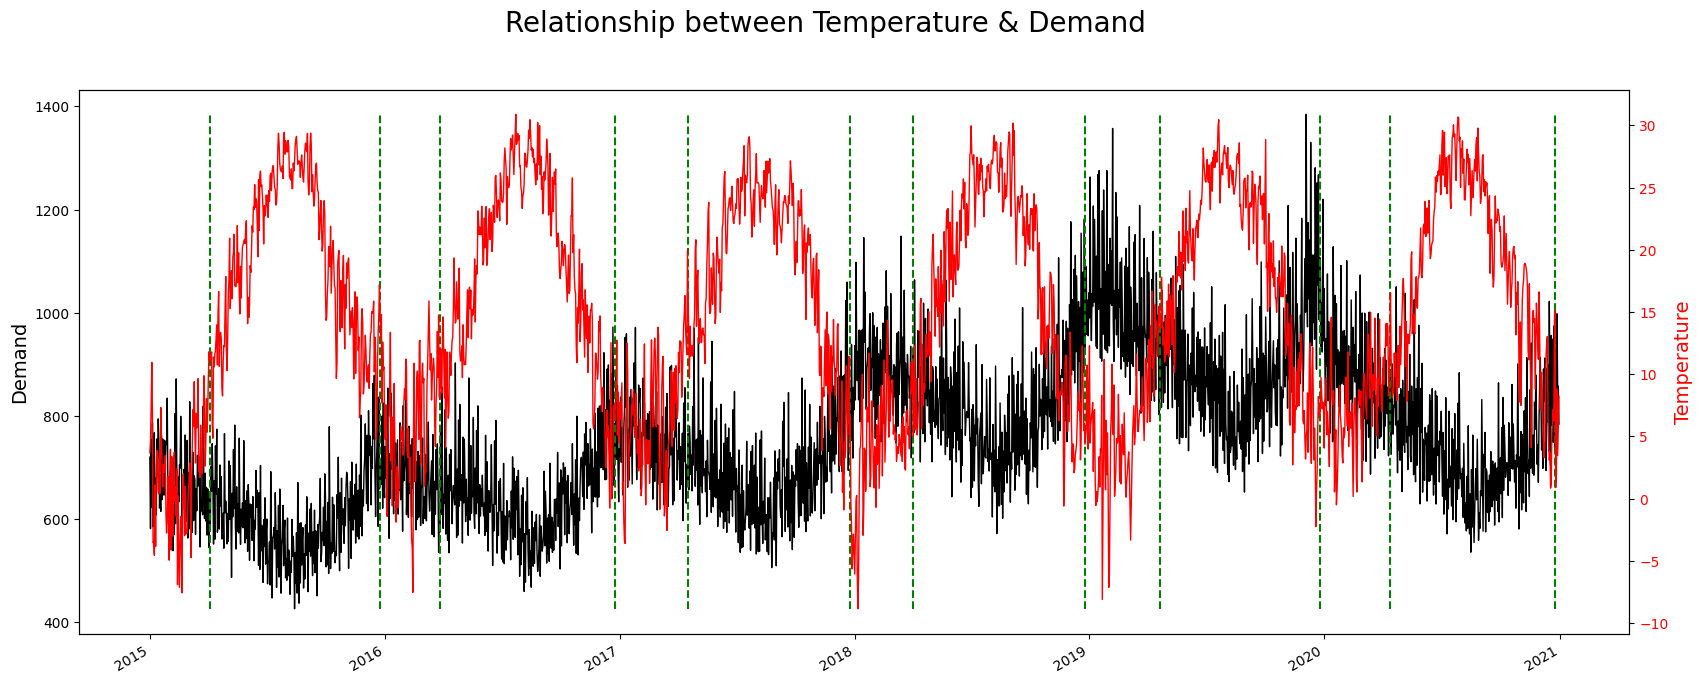

In [17]:
plot_demand_vs_col(df, col='Temperature')

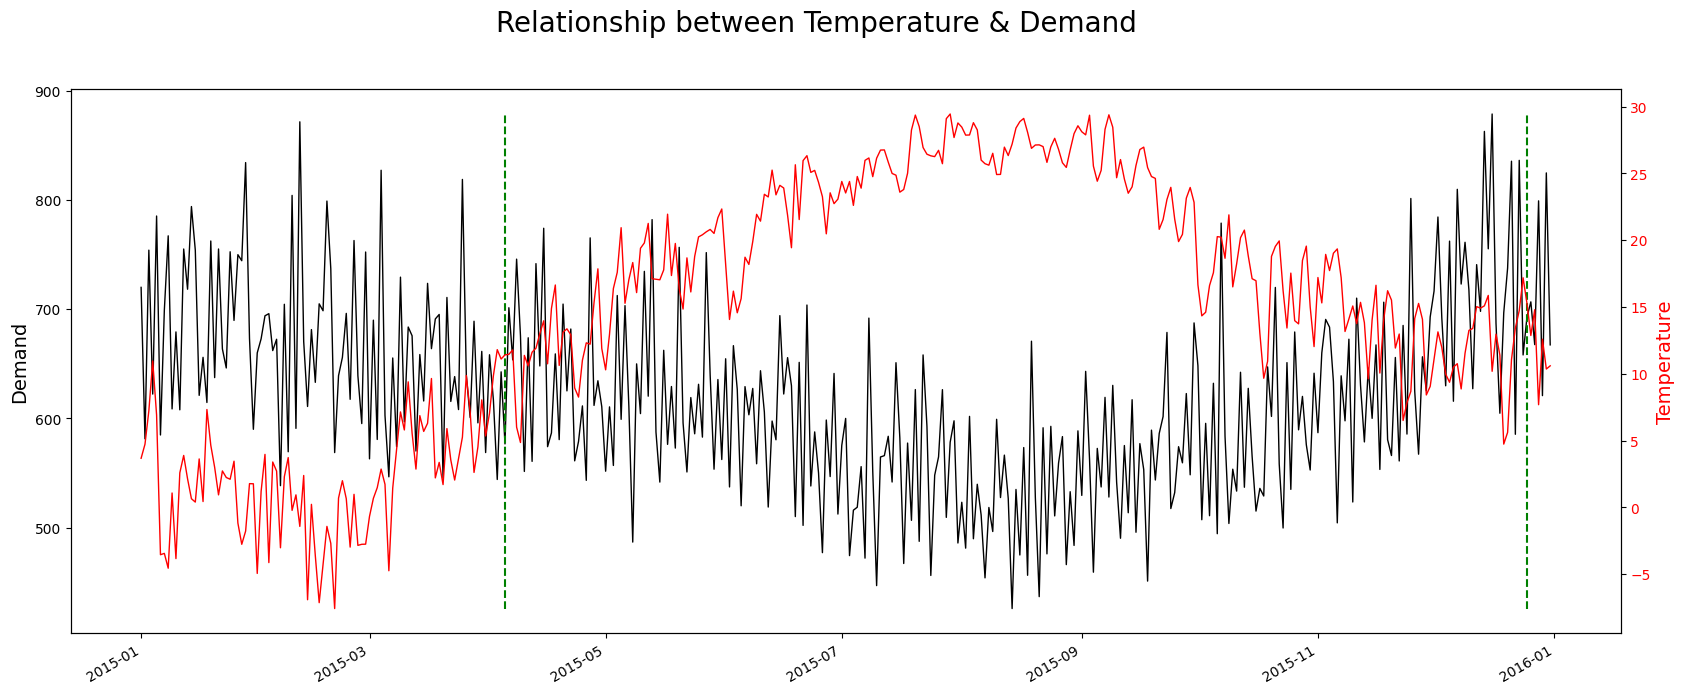

In [18]:
# Simply for the year 2015
plot_demand_vs_col(df.loc['2015-01-01':'2015-12-31'], col='Temperature')

### Correlation & Auto-Correlation

In [19]:
df[['y', 'Temperature', 'Marketing']].corr().round(2)

,y,Temperature,Marketing
y,1.00,-0.40,0.28
Temperature,-0.40,1.00,-0.19
Marketing,0.28,-0.19,1.00


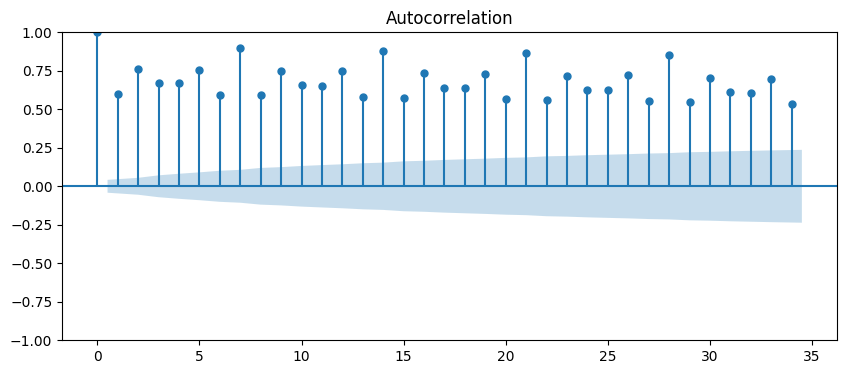

In [20]:
#plt.rcParams['figure.figsize'] = (12, 8)

# Create figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(df['y'], ax=ax)
plt.show()

Not surprisingly, there is a weekly correlation. On the 7, 14 ... we observe a jump.

Also, all in all, the correlation with past values are high.